In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

from datetime import datetime
import time
import csv
sns.set_style("darkgrid")
results_2018 = pd.read_csv('./Runners_all_results_2018.csv', header = 0, encoding='latin-1')
results_2018['OfficialTime'] = results_2018['OfficialTime'].apply(lambda x: datetime.combine(datetime.min, datetime.strptime(x, '%H:%M:%S').time()) - datetime.min)
results_2019 = pd.read_csv('./Runners_all_results_2019.csv', header = 0, encoding='latin-1', error_bad_lines=False)
results_2019['OfficialTime'] = results_2019['OfficialTime'].apply(lambda x: datetime.combine(datetime.min, datetime.strptime(x, '%H:%M:%S').time()) - datetime.min)


b'Skipping line 26144: expected 20 fields, saw 21\n'


In [2]:
results_2018['Year']=2018
results_2019['Year']=2019
results = results_2019.append(results_2018, ignore_index = True, sort=True)

In [3]:
tx = 20
top = results_2019.head(tx).append(results_2018.head(tx), ignore_index = True, sort=True)

Text(0.5, 1.0, 'Participants per age group 2019')

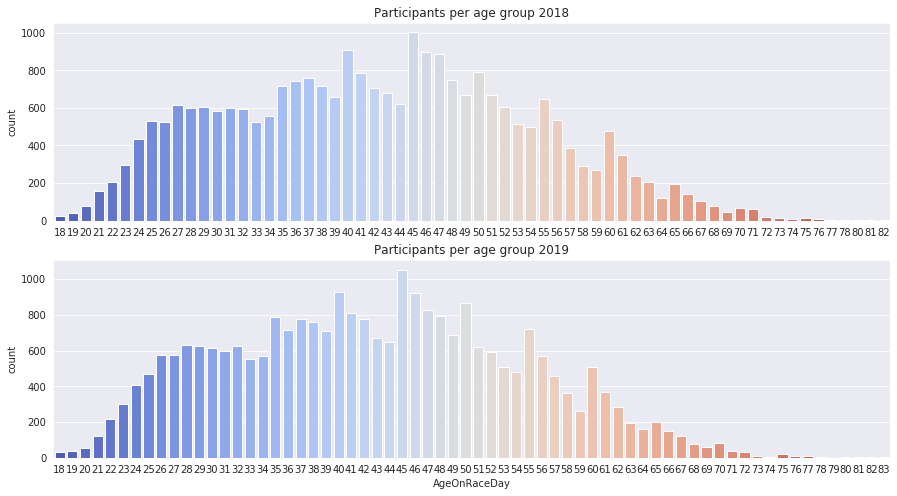

In [4]:
fig, ax =plt.subplots(2,1)
g = sns.countplot('AgeOnRaceDay', data=results_2018, palette="coolwarm", ax=ax[0])
g.figure.set_size_inches(15,8)
g.set_title("Participants per age group 2018")
g.set_xlabel('')
g = sns.countplot('AgeOnRaceDay', data=results_2019, palette="coolwarm", ax=ax[1])
g.figure.set_size_inches(15,8)
g.set_title("Participants per age group 2019")

Text(0.5, 1.0, 'Distribution of finish times per Age group 2019')

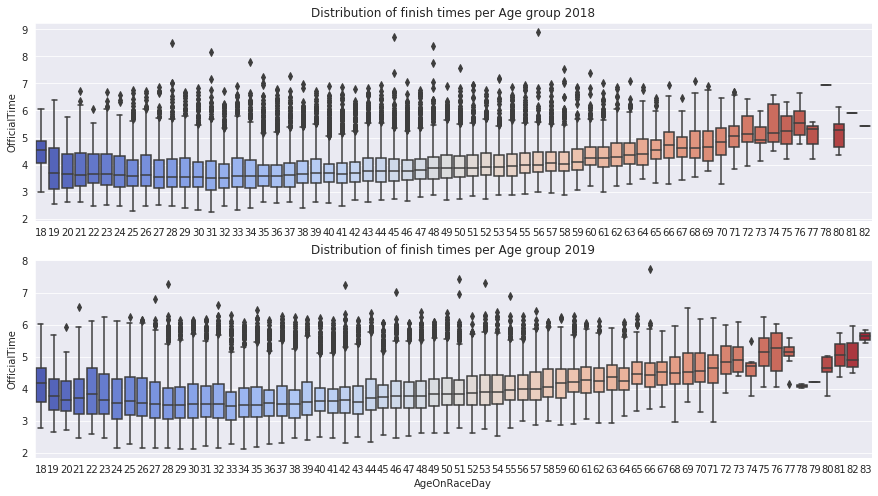

In [5]:
fig, ax =plt.subplots(2,1)
df = results_2018
g = sns.boxplot(df['AgeOnRaceDay'], df['OfficialTime'].apply(lambda x: x.total_seconds()/3600), palette="coolwarm", ax=ax[0])
g.figure.set_size_inches(15,8)
g.set_title("Distribution of finish times per Age group 2018")
g.set_xlabel('')
df = results_2019
g = sns.boxplot(df['AgeOnRaceDay'], df['OfficialTime'].apply(lambda x: x.total_seconds()/3600), palette="coolwarm", ax=ax[1])
g.figure.set_size_inches(15,8)
g.set_title("Distribution of finish times per Age group 2019")

Text(0, 0.5, 'Count')

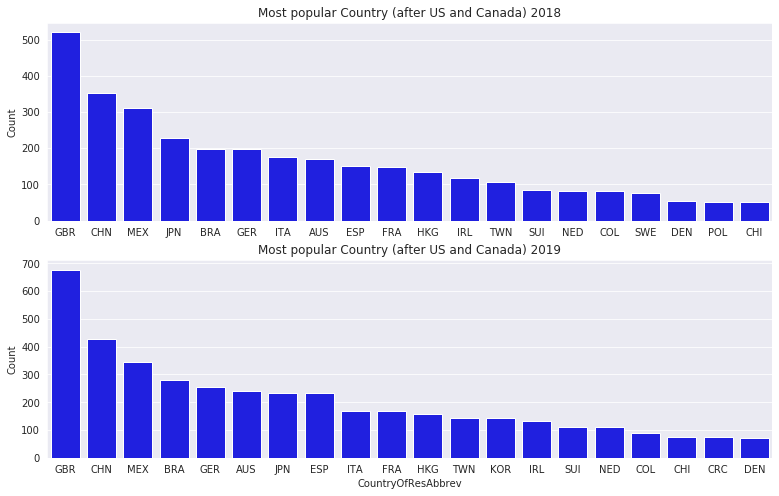

In [6]:
fig, ax =plt.subplots(2,1)
df = results_2018
s = df.groupby('CountryOfResAbbrev').count()['City'].sort_values(ascending=False).head(22)[2:]
g = sns.barplot(s.index, s, color='blue', ax=ax[0])
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country (after US and Canada) 2018")
g.set_xlabel('')
g.set_ylabel('Count')
df = results_2019
s = df.groupby('CountryOfResAbbrev').count()['City'].sort_values(ascending=False).head(22)[2:]
g = sns.barplot(s.index, s, color='blue', ax=ax[1])
g.figure.set_size_inches(13,8)
g.set_title("Most popular Country (after US and Canada) 2019")
g.set_ylabel('Count')